# Diagnosis

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from IPython.display import Image

## Bias vs Variance

#### Degree of Polynomial vs Error

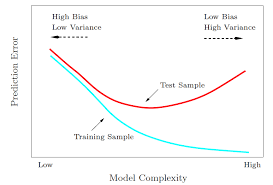

In [3]:
Image('bv-2.png',width=400,height=400)

### Learning Curves

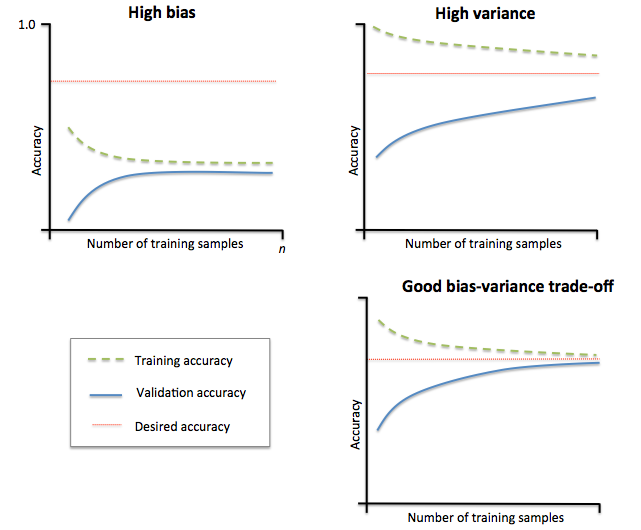

In [4]:
Image('lc.png')

From this we can say that

If a learning algorithm is suffering from high bias, getting more training data will not (by itself) help much.

And if it is suffering from high variance, getting more training data is likely to help.

Let's again consider the Wiscon Breast Cancer dataset.

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
X = df.loc[:,2:]
Y = df.loc[:,1]
le = LabelEncoder()
Y = le.fit_transform(Y)

In [9]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [12]:
from sklearn.learning_curve import learning_curve

In [13]:
pipe_lr = Pipeline([('sca',StandardScaler()),
                    ('clf',LogisticRegression(penalty='l2',random_state=0))])

In [14]:
train_sizes,train_scores,test_scores = learning_curve(pipe_lr,X_train,Y_train,
                                                      train_sizes=np.linspace(0.1,1.0,10),
                                                      cv=10,n_jobs=1)

In [15]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)

In [16]:
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

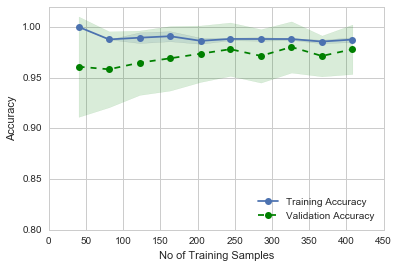

In [17]:
plt.plot(train_sizes,train_mean,marker='o',label='Training Accuracy')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,alpha=0.15)
plt.plot(train_sizes,test_mean,'g--',marker='o',label='Validation Accuracy')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='green',alpha=0.15)
plt.ylim([0.8,1.02])
plt.xlabel('No of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

From the above plot we can conclude that our model is well fit on the test data so it is a **Good Bias-Variance Trade-Off**.

### Validation Curves

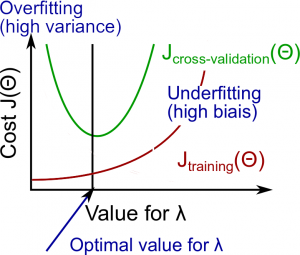

In [18]:
Image('vc.png')

In [19]:
from sklearn.learning_curve import validation_curve

In [20]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [21]:
train_scores,test_scores = validation_curve(pipe_lr,X_train,Y_train,
                                            param_range=param_range,
                                            param_name='clf__C',cv=10)

In [22]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

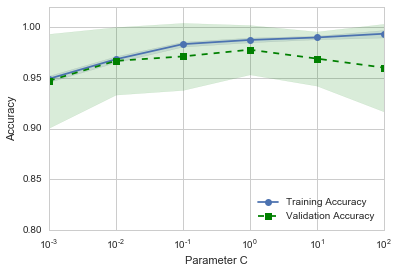

In [23]:
plt.plot(param_range,train_mean,marker='o',label='Training Accuracy')
plt.fill_between(param_range,train_mean-train_std,train_mean+train_std,alpha=0.15)
plt.plot(param_range,test_mean,'g--',marker='s',label='Validation Accuracy')
plt.fill_between(param_range,test_mean-test_std,test_mean+test_std,color='green',alpha=0.15)
plt.ylim([0.8,1.02])
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

From the above plot we can observe that as we increase the parameter C which is inverse of Regularization Strength, the curve underfits and overfits for smaller values of C, so in this case the sweet spot may be at 0.1.

### Debugging a Learning algorithm

Get more training examples - fixes high variance

Try smaller sets of features - fixes high variance

Try getting additional features - fixes high bias

Try adding Polynomial features - fixes high bias

Try decreasing $\lambda$ - fixes high bias

Try increasing $\lambda$ - fixes high variance